In [2]:
import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
import locale
locale.setlocale(locale.LC_ALL,'no_NO')
import pandas as pd
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter


## Inputs
stock_return = 0.0575
stock_volatility = 0.16
weight_stock = 0.5

bond_return = 0.0274
bond_volatility = 0.06
weight_bond= 0.5

correlation = 0.1

percentage_cost= 0.0175  #årlig forvaltningskostnad
time_horizon = 25

initial_value = 1000000
yearly_deposit = 1000

iterations=100000 # antall iterasjoner

############################################################################################################
## Key values
covariance= stock_volatility*bond_volatility
portfolio_VAR = (weight_stock**2 * stock_volatility**2) + (weight_bond**2 * bond_volatility**2) + (2 * weight_stock * weight_bond * covariance)
portfolio_std = np.sqrt(portfolio_VAR)
portfolio_expected_return = weight_stock * stock_return + weight_bond * bond_return

#Simulation
sim = DataFrame() 
sim2 =DataFrame()
sim3=DataFrame()

streams = []
streams2 = []

for x in range (iterations):
    expected_return= portfolio_expected_return
    volatility= portfolio_std
    time_horizon1= time_horizon
    pv=initial_value
    pv2=initial_value
    annual_investment= yearly_deposit
    stream=[]
    stream2=[]
    stream3 =[]
    for i in range(time_horizon):
        end= round(pv*(1+np.random.normal(expected_return,volatility))+annual_investment,2)
        acost =round(pv*(1+np.random.normal(expected_return-percentage_cost,volatility))+annual_investment,2)
        stream.append(end)
        stream2.append(acost)
        
        pv = end
        pv2=acost
        
        
    streams.append(stream)
    streams2.append(stream2)

sim = pd.concat([pd.Series(s) for s in streams], axis=1)
sim_netto= pd.concat([pd.Series(s) for s in streams2], axis=1)


# Create a new dataframe with the initial value as the first row in every column
new_df = pd.DataFrame(initial_value, columns=sim.columns, index=[0])

# Concatenate the new dataframe with the existing dataframe
sim = pd.concat([new_df, sim])
sim_netto =pd.concat([new_df, sim_netto])

sim.reset_index(inplace=True, drop=True)
sim_netto.reset_index(inplace=True, drop=True)
cost= sim*percentage_cost

def VaR(returns, alpha):
    return np.percentile(returns,alpha)

def CVaR(returns, alpha):
    returns= np.array(returns)
    belowVaR = returns <= VaR(returns, alpha=alpha)
    return returns[belowVaR].mean()




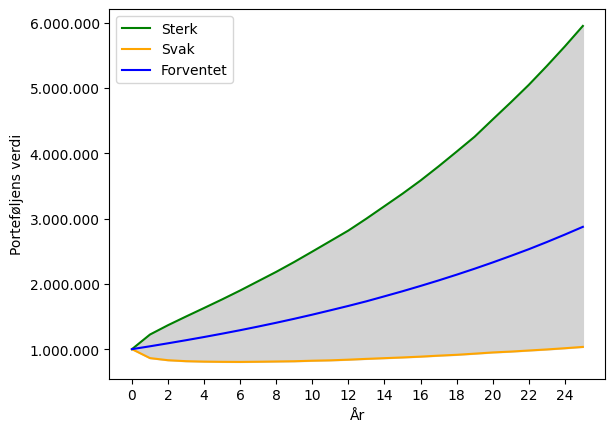

In [3]:
### uten kostnad ###

var_95=[]
var_5= []
for i in range(time_horizon+1):
    var_95.append(VaR(sim.iloc[i],5))
    var_5.append(VaR(sim.iloc[i],95))

# Calculate the mean of each row in the sim DataFrame
means = sim.mean(axis=1)

plt.plot(var_5, label='Sterk', color = 'green')
plt.plot(var_95, label = 'Svak', color= 'orange')
plt.plot(means, label='Forventet', color= 'blue')
plt.fill_between(range(time_horizon+1), var_95, var_5, color='#d3d3d3')

plt.xticks(range(0, time_horizon + 1, 2), range(0, time_horizon + 1, 2))


plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f} NOK'))
# Use the ',' as the decimal separator and '.' as the thousand separator
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x, ',.0f').replace(',', '.')))

plt.xlabel('År')
plt.ylabel('Porteføljens verdi')
plt.legend(loc='best')

plt.show()    


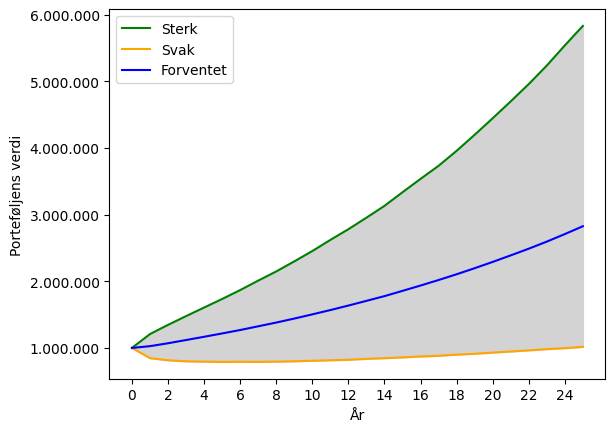

In [4]:
#Netto avkastning
var_95=[]
var_5= []
for i in range(time_horizon+1):
    var_95.append(VaR(sim_netto.iloc[i],5))
    var_5.append(VaR(sim_netto.iloc[i],95))

# Calculate the mean of each row in the sim DataFrame
means = sim_netto.mean(axis=1)


plt.plot(var_5, label='Sterk', color = 'green')
plt.plot(var_95, label = 'Svak', color= 'orange')
plt.plot(means, label='Forventet', color= 'blue')
plt.fill_between(range(time_horizon+1), var_95, var_5, color='#d3d3d3')

plt.xticks(range(0, time_horizon + 1, 2), range(0, time_horizon + 1, 2))


plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f} NOK'))
# Use the ',' as the decimal separator and '.' as the thousand separator
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x, ',.0f').replace(',', '.')))

plt.xlabel('År')
plt.ylabel('Porteføljens verdi')
plt.legend(loc='best')

plt.show()    

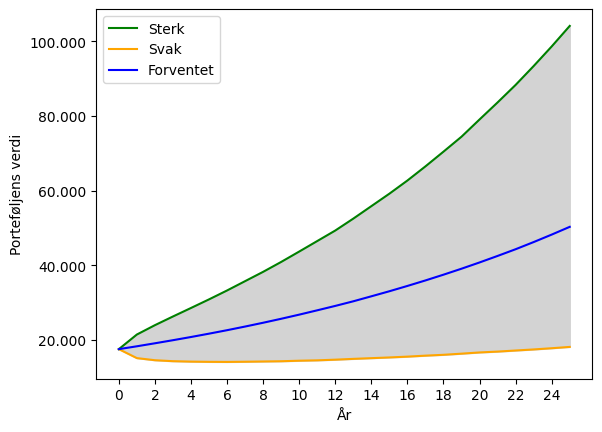

In [5]:
#Netto avkastning

var_95=[]
var_5= []
for i in range(time_horizon+1):
    var_95.append(VaR(cost.iloc[i],5))
    var_5.append(VaR(cost.iloc[i],95))

# Calculate the mean of each row in the sim DataFrame
means = cost.mean(axis=1)


plt.plot(var_5, label='Sterk', color = 'green')
plt.plot(var_95, label = 'Svak', color= 'orange')
plt.plot(means, label='Forventet', color= 'blue')
plt.fill_between(range(time_horizon+1), var_95, var_5, color='#d3d3d3')

plt.xticks(range(0, time_horizon + 1, 2), range(0, time_horizon + 1, 2))


plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f} NOK'))
# Use the ',' as the decimal separator and '.' as the thousand separator
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x, ',.0f').replace(',', '.')))

plt.xlabel('År')
plt.ylabel('Porteføljens verdi')
plt.legend(loc='best')

plt.show()
